## Scottish Protected Areas ##

United Kingdom still adheres to Habitats and Birds Directive with slight changes in legislation


Scotland: 
Marine Protected Areas (MPAs): https://cagmap.snh.gov.uk/natural-spaces/dataset.jsp?code=MPA
<br>
SPA: Special Protection Areas (SPAs) https://cagmap.snh.gov.uk/natural-spaces/dataset.jsp?code=SPA 
<br>
SAC: Special Areas of Conservation (SACs): https://cagmap.snh.gov.uk/natural-spaces/dataset.jsp?code=SAC

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader

import xarray as xr
import atlite

import logging
import warnings

warnings.simplefilter('ignore')
logging.captureWarnings(False)
logging.basicConfig(level=logging.INFO)

import numpy as np
from shapely.geometry import Polygon


In [2]:
marin= gpd.read_file(r"..\data\MPA_SCOTLAND_ESRI\MPA_SCOTLAND.shp")
spa = gpd.read_file(r"..\data\c20220316-UKSPAswithMarineComponents-WGS84\c20220316_UKSPAswithMarineComponents_WGS84.shp")
sac= gpd.read_file(r"..\data\SAC_SCOTLAND_ESRI\SAC_SCOTLAND.shp")
marin1= marin.copy()
spa1=spa.copy()
sac1=sac.copy()

The spa-dataset contains English sites, strangely, all of them are located on the coast and none on the inland.

In [3]:
spa1=spa1[spa1['Country'].isin(['Scotland inshore', 'Scotland inshore & Scotland offshore',
       'England inshore & Scotland inshore'])]

In [4]:
sac1

,NAME,PA_CODE,STATUS,SITE_HA,EUR_CODE,MPA_NET,GEO_LOC,geometry
0,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((405299.050 829805.003, 405298.600 82..."
1,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((405186.820 829814.153, 405185.920 82..."
2,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((408819.600 833046.863, 408819.400 83..."
3,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((408978.900 833088.163, 408979.700 83..."
4,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((409005.200 833000.063, 409005.200 83..."
...,...,...,...,...,...,...,...,...
2597,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((405499.400 830080.863, 405499.000 83..."
2598,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((405360.100 830147.763, 405358.900 83..."
2599,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((405337.400 830185.763, 405340.500 83..."
2600,Buchan Ness to Collieston,8214,Current,206.03,UK0030101,N,MIXED,"POLYGON ((408773.900 833132.563, 408773.500 83..."


In [5]:
spa1

,OBJECTID,SITE_CODE,SITE_NAME,SITE_STATU,Country,CP2_REGION,AREA_HA,LONG_dd,LAT_dd,Agency,PreDesCode,WDPA_CODE,NonMarFeat,EST_DATE,Shape_Leng,Shape_Area,geometry
0,1,UK9020321,Scapa Flow,SPA,Scotland inshore,Scottish Continental Shelf,31819.88,-3.134343,58.876969,NatureScot,None,None,No,16/02/2022,5.581579,0.049558,"MULTIPOLYGON (((-2.74294 58.92235, -2.74290 58..."
1,2,UK9020314,North Orkney,SPA,Scotland inshore,Scottish Continental Shelf,21173.17,-2.938558,59.079512,NatureScot,None,None,No,16/02/2022,3.863884,0.033147,"POLYGON ((-2.97613 59.16365, -2.97611 59.16363..."
2,3,UK9020312,Bluemull and Colgrave Sounds,SPA,Scotland inshore,Northern North Sea,3823.27,-1.000729,60.627000,NatureScot,None,None,No,03-12-2020,1.556893,0.006276,"POLYGON ((-0.97183 60.70741, -0.97180 60.70740..."
3,4,UK9020310,Coll and Tiree,SPA,Scotland inshore,Minches and Western Scotland,79475.15,-6.769511,56.599000,NatureScot,None,None,No,03-12-2020,5.395294,0.115833,"POLYGON ((-6.43055 56.75833, -6.43055 56.68889..."
4,5,UK9020318,Sound of Gigha,SPA,Scotland inshore,Minches and Western Scotland,36326.83,-5.682772,55.786367,NatureScot,None,None,No,03-12-2020,3.413082,0.051796,"POLYGON ((-5.62211 55.89722, -5.62211 55.89713..."
5,6,UK9020319,West Coast of the Outer Hebrides,SPA,Scotland inshore,Scottish Continental Shelf,132170.04,-7.332725,57.064039,NatureScot,None,None,No,03-12-2020,14.475943,0.197326,"MULTIPOLYGON (((-7.50444 56.95766, -7.50442 56..."
6,7,UK9020311,"East Mainland Coast, Shetland",SPA,Scotland inshore,Northern North Sea,23333.23,-1.151551,60.219120,NatureScot,None,None,No,03-12-2020,5.087907,0.037924,"MULTIPOLYGON (((-0.99703 60.30876, -0.99785 60..."
7,12,UK9020331,Seas off Foula,SPA,Scotland inshore & Scotland offshore,Scottish Continental Shelf,341215.00,-2.485031,60.142036,JNCC and NatureScot,None,None,No,03-12-2020,5.328609,0.551595,"POLYGON ((-2.89209 60.43781, -2.89062 60.38395..."
8,13,UK9020332,Seas off St Kilda,SPA,Scotland inshore & Scotland offshore,Scottish Continental Shelf,399469.00,-8.522351,58.095965,JNCC and NatureScot,None,None,No,03-12-2020,7.060384,0.606518,"POLYGON ((-8.40792 58.50280, -8.39814 58.44925..."
9,14,UK9020316,Outer Firth of Forth and St Andrews Bay Complex,SPA,Scotland inshore & Scotland offshore,Northern North Sea,272068.09,-2.742096,56.136000,JNCC and NatureScot,None,None,No,03-12-2020,7.596400,0.394043,"MULTIPOLYGON (((-2.16447 55.91548, -2.16465 55..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        38 non-null     object  
 1   PA_CODE     38 non-null     float64 
 2   EURO_CODE   38 non-null     object  
 3   LEAD        38 non-null     object  
 4   SITE_HA_ME  38 non-null     float64 
 5   STATUS      38 non-null     object  
 6   GEO_LOC     38 non-null     object  
 7   geometry    38 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 2.5+ KB


<AxesSubplot:>

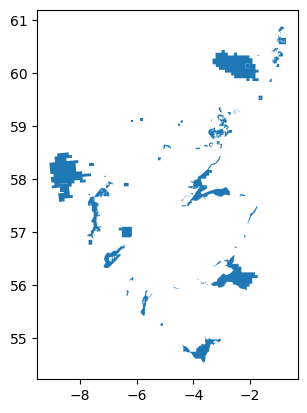

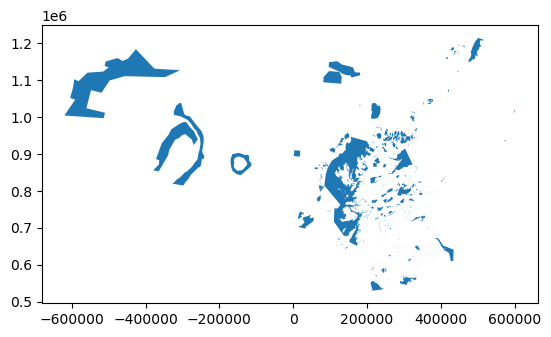

In [6]:
marin1.info()
spa1.plot()
sac1.plot()


In [7]:
spa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
marin1
spa

,OBJECTID,SITE_CODE,SITE_NAME,SITE_STATU,Country,CP2_REGION,AREA_HA,LONG_dd,LAT_dd,Agency,PreDesCode,WDPA_CODE,NonMarFeat,EST_DATE,Shape_Leng,Shape_Area,geometry
0,1,UK9020321,Scapa Flow,SPA,Scotland inshore,Scottish Continental Shelf,31819.880000,-3.134343,58.876969,NatureScot,None,None,No,16/02/2022,5.581579,0.049558,"MULTIPOLYGON (((-2.74294 58.92235, -2.74290 58..."
1,2,UK9020314,North Orkney,SPA,Scotland inshore,Scottish Continental Shelf,21173.170000,-2.938558,59.079512,NatureScot,None,None,No,16/02/2022,3.863884,0.033147,"POLYGON ((-2.97613 59.16365, -2.97611 59.16363..."
2,3,UK9020312,Bluemull and Colgrave Sounds,SPA,Scotland inshore,Northern North Sea,3823.270000,-1.000729,60.627000,NatureScot,None,None,No,03-12-2020,1.556893,0.006276,"POLYGON ((-0.97183 60.70741, -0.97180 60.70740..."
3,4,UK9020310,Coll and Tiree,SPA,Scotland inshore,Minches and Western Scotland,79475.150000,-6.769511,56.599000,NatureScot,None,None,No,03-12-2020,5.395294,0.115833,"POLYGON ((-6.43055 56.75833, -6.43055 56.68889..."
4,5,UK9020318,Sound of Gigha,SPA,Scotland inshore,Minches and Western Scotland,36326.830000,-5.682772,55.786367,NatureScot,None,None,No,03-12-2020,3.413082,0.051796,"POLYGON ((-5.62211 55.89722, -5.62211 55.89713..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,321,UK9003032,Sleibhtean agus Cladach Thiriodh (Tiree Wetlan...,SPA,Scotland inshore,Minches and Western Scotland,1939.760000,-6.844000,56.510000,NatureScot,None,555541724,Yes,01-10-2001,2.632613,0.002825,"MULTIPOLYGON (((-6.88524 56.48017, -6.88519 56..."
121,322,UK9006101,Flamborough and Filey Coast,SPA,England inshore,Northern North Sea & Southern North Sea,7857.990000,-0.179200,54.165800,NE,None,555541784,No,01-03-1993,1.127331,0.010812,"MULTIPOLYGON (((-0.21605 54.18221, -0.16858 54..."
122,383,UK9020330,Solent and Dorset Coast,SPA,England inshore,Eastern Channel,88980.550000,-1.389300,50.704756,NE,None,555703761,No,16-01-2020,8.585956,0.113342,"MULTIPOLYGON (((-1.16712 50.85259, -1.16712 50..."
123,384,UK9006061,Teesmouth and Cleveland Coast,SPA,England inshore,Northern North Sea\r\n,12210.620000,-1.150565,54.670023,NE,None,555541782,Yes,01-08-1995,2.224633,0.017012,"MULTIPOLYGON (((-1.23368 54.76955, -1.20076 54..."


The limits are the resulting delimitations of the cutout.<br>
Result of cells.unary_union.bounds.Input coordinates of the cutout were farther apart.


In [9]:
limits= np.array([-4.375, 51.375, 10.125, 60.875])
xmin, xmax= (-4.375, 10.125)
ymin, ymax= (51.375, 60.875)
lat_point_list = [ymin, ymax, ymax,ymin,ymin]
lon_point_list = [xmin, xmin ,xmax ,xmax, xmin ]
original_polygon = Polygon(zip(lon_point_list, lat_point_list))
polygon = Polygon([original_polygon.boundary.interpolate(i, normalized=True) for i in np.linspace(0, 1, 10000)])
poly = gpd.GeoDataFrame(['Selection'], geometry=[polygon], crs=4326)
#poly.iloc[0].geometry.wkt

#ohne die Interpolation wird das Polygon erstmal mit vier Eckpunkten erstellt
#nach der Transoframtion in 3035 würden diese vier Punkte korrekt auf den GLobus gesetzt
#aber die Verbindung ist naiv auf dem kürzesten Wege und beachtet nicht mehr die RIchtung ( verläuft nicht mehr entlang des Längen und Breitengrads
# deswegen fügt man durch Interpolate viel mehr Punkte entlang der WEgstrecke zurück --> die Verzerrung gilt nur nich für minimal WEgstücke
#Alternative wäre: man nimmt die Cells( unary_union) aus der Main-Datei

<AxesSubplot:>

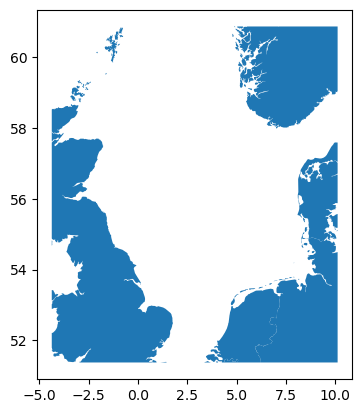

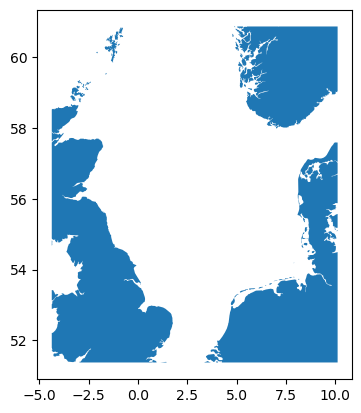

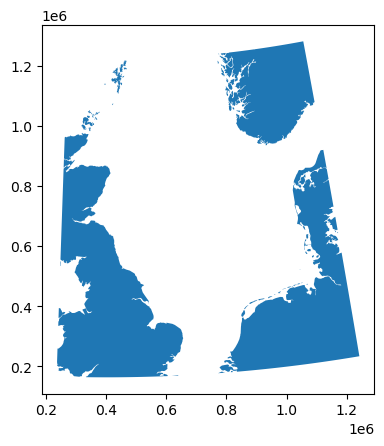

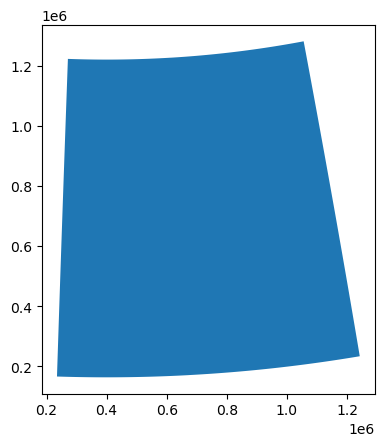

In [10]:
#hier Reduktion auf den Cutout-Ausschnitt mittels helper

shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

BorderingStates_init = gpd.GeoSeries({r.attributes['NAME_EN']: r.geometry
                      for r in reader.records()},
                     crs={'init': 'epsg:4326'}
                     ).reindex(['United Kingdom', 'Denmark','Germany','Norway','France','Netherlands','Belgium']) 

helper = gpd.GeoDataFrame(geometry=BorderingStates_init.geometry)#.reset_index().rename(columns={'index':'Countries'})#so kommt man zu Index
helper.to_crs(4326) #komischerweise lässt sich das crs oben nicht übergeben
helper= helper.clip(poly)
helper.plot()
inland= helper.dissolve() #dissolve works only with GPDFs, unary_union returns a Multiploygon#coast0
inland.plot()
inland=inland.to_crs(27700)
inland.plot()
poly=poly.to_crs(27700)
poly.plot()
#poly.iloc[0].geometry.wkt ist sehr lang



In [11]:
# das EPSG der Daten ist 27700

marin2= marin1.clip(poly)
marin3 = marin2.overlay(inland, how='difference')

spa1=spa1.to_crs(27700)
spa2=spa1.clip(poly)
spa3=spa2.overlay(inland, how='difference') #no effect, no inland

sac2= sac1.clip(poly)
sac3= sac2.overlay(inland, how='difference') #there is data on the inland


In [12]:
spa1.describe()

,OBJECTID,AREA_HA,LONG_dd,LAT_dd,Shape_Leng,Shape_Area
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,216.155172,33855.989828,-3.983453,57.991428,2.256676,0.051292
std,114.623227,80034.536098,2.152596,1.523703,2.620307,0.122339
min,1.000000,475.540000,-8.573611,54.725723,0.180945,0.000746
25%,234.500000,3251.502500,-5.899026,56.832292,0.541186,0.004787
50%,265.500000,6415.600000,-3.350278,57.864806,1.330996,0.009408
75%,291.250000,16380.715000,-2.486773,59.110208,2.618725,0.026522
max,321.000000,399469.000000,-0.855556,60.828333,14.475943,0.606518


(500000.0, 1700000.0)

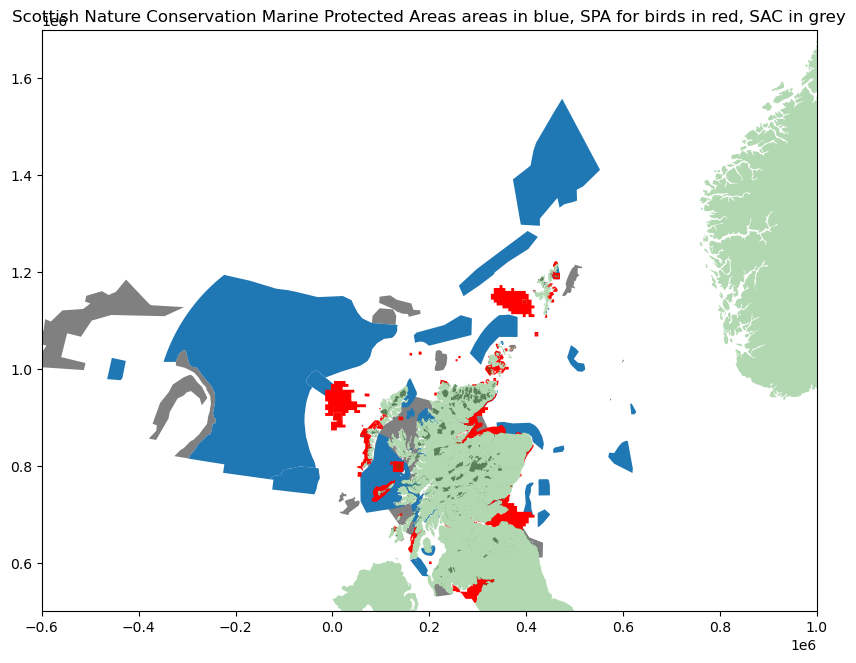

In [13]:
fig, ax =plt.subplots(1,1,figsize=(10,10))
marin1.plot(markersize=0.5,ax=ax)
spa1.plot(color='red',ax=ax)
sac1.plot(color='grey',ax=ax,zorder=0)

helper2 = gpd.GeoDataFrame(geometry=BorderingStates_init[0:7].geometry)
helper2.to_crs(27700).plot(ax=ax,color='green',alpha=0.3)
ax.set_title("Scottish Nature Conservation Marine Protected Areas areas in blue, SPA for birds in red, SAC in grey")

#Bouvet, a tiny Norwegian island, Curacao, and French Guyana are included in the original dataset 
#so: limit the axis
ax.set_xlim(-0.6*10**6,1*10**6)
ax.set_ylim(0.5*10**6,1.7*10**6)
#

Now it looks similar to offical maps of MPAs:https://www.gov.scot/policies/marine-environment/marine-protected-areas/

<AxesSubplot:title={'center':'MPA in blue, SPA in red, SAC in grey'}>

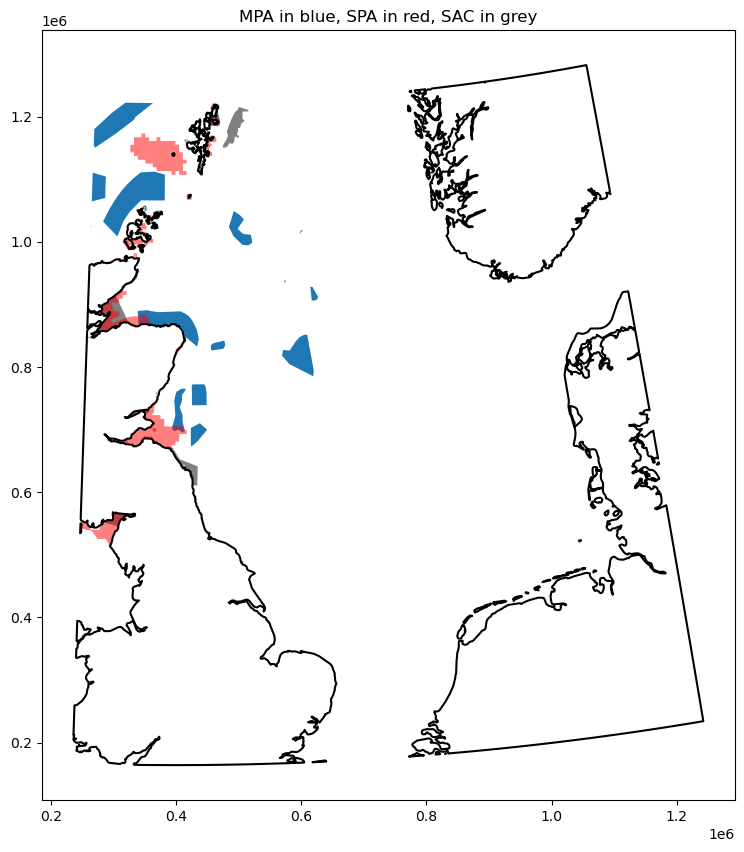

In [14]:
fig, ax =plt.subplots(1,1,figsize=(10,10))
ax.set_title('MPA in blue, SPA in red, SAC in grey')
marin2.plot(ax=ax)
inland.boundary.plot(color='black',ax=ax)
sac3.plot(ax=ax,color='grey')
#marin3.plot(ax=ax,color='red',zorder=1, alpha= 0.2) #there are no inland areas in this dataset
spa2.plot(ax=ax,color='red',zorder=1,alpha=0.5)

In [15]:
sac3['TYPE']='SAC_SC'
spa3['TYPE']='SPA_SC'
marin3['TYPE']='MPA_SC'

In [16]:
b= pd.concat([spa3,sac3,marin3])

In [17]:
b.to_file(filename=r"..\data\protected_areas_shapefiles\protected_areas_SC.gpkg", driver='GPKG') 

## 